<a href="https://colab.research.google.com/github/msv5wx/launch/blob/master/Diabetes_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files

uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [0]:
#reading in the data
diabetes = pd.read_csv("diabetes.csv")

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [279]:
#data overview
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Values of 0 do not make sense for the Glucose, BloodPressure, SkinThickness, Insulin, BMI columns and need to be corrected

I will treat them as missing values

In [0]:
#replace 0 with NaN
diabetes_new = diabetes.copy(deep = True)
diabetes_new[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_new[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [281]:
#number of null values for each column
print(diabetes_new.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [6]:
diabetes_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [0]:
cols=diabetes_new.columns

Split into training and test

In [0]:
np.random.seed(68)
from sklearn.model_selection import train_test_split
train, test = train_test_split(diabetes_new, test_size=0.2, random_state=150)

In [0]:
test.to_csv('diabetes_test.csv', sep=",", index = False)

In [0]:
ddf = train

In [9]:
#isolate outcome variable
y=ddf['Outcome']
y.head()

41     0
624    0
116    1
571    0
677    0
Name: Outcome, dtype: int64

In [10]:
#isolate x variables
x=ddf.drop('Outcome',axis=1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
41,7,133.0,84.0,NaN,NaN,40.2,0.696,37
624,2,108.0,64.0,NaN,NaN,30.8,0.158,21
116,5,124.0,74.0,NaN,NaN,34.0,0.220,38
571,2,130.0,96.0,NaN,NaN,22.6,0.268,21
677,0,93.0,60.0,NaN,NaN,35.3,0.263,25


In [0]:
#split into training and test data
np.random.seed(68)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=150)

In [14]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
127,1,118.0,58.0,36.0,94.0,33.3,0.261,23
333,12,106.0,80.0,NaN,NaN,23.6,0.137,44
708,9,164.0,78.0,NaN,NaN,32.8,0.148,45
289,5,108.0,72.0,43.0,75.0,36.1,0.263,33
360,5,189.0,64.0,33.0,325.0,31.2,0.583,29


In [291]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
243,6,119.0,50.0,22.0,176.0,27.1,1.318,33
510,12,84.0,72.0,31.0,NaN,29.7,0.297,46
723,5,117.0,86.0,30.0,105.0,39.1,0.251,42
733,2,106.0,56.0,27.0,165.0,29.0,0.426,22
253,0,86.0,68.0,32.0,NaN,35.8,0.238,25


To fill these Nan values the data distribution needs to be understood¶

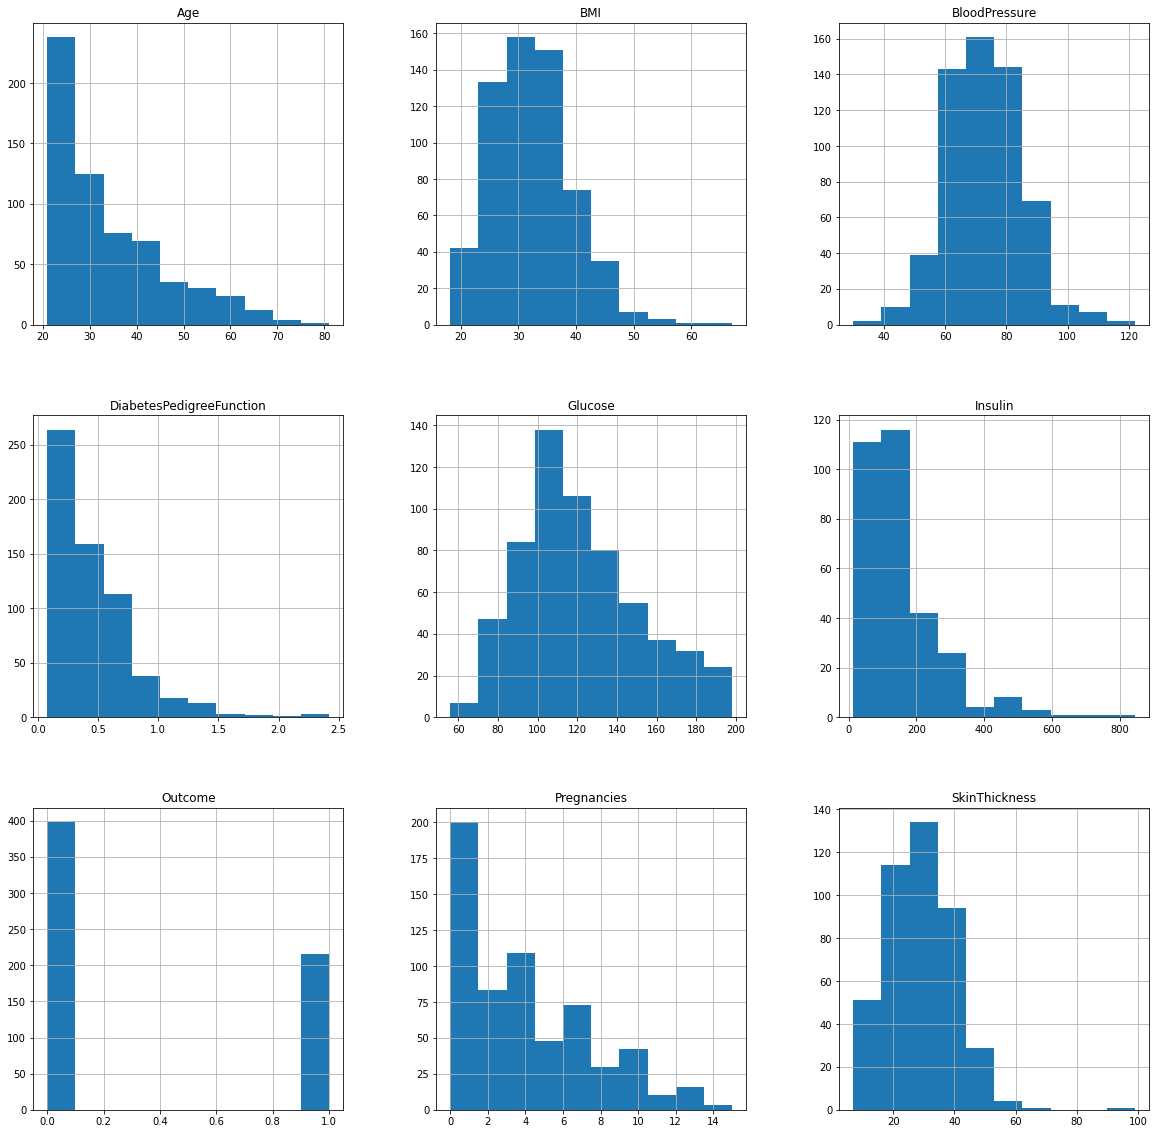

In [292]:
plot = ddf.hist(figsize = (20,20))
#notice skewed distributions for certain variables

scaling 

*   glucose- not skewed
*   blood pressure- not skewed
*   SkinThickness- skewed
*   Insulin- skewed
*   BMI- slight skew

mostly not skewed so will go with mean in simple imputer

In [0]:
from sklearn.impute import SimpleImputer

In [0]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler

In [0]:
pipe = Pipeline([
                 ('imputer', SimpleImputer(strategy="mean")), 
                 ('scaler', StandardScaler())
])

In [0]:
x_train = pipe.fit_transform(X_train)

In [0]:
x_test = pipe.transform(X_test)

In [0]:
x_train = pd.DataFrame(x_train)

In [0]:
x_train.rename(columns={0:'Pregnancies',
                          1:'Glucose',
                          2:'BloodPressure',
                          3: 'SkinThickness',
                          4: 'Insulin',
                          5: 'BMI',
                          6: 'DiabetesPedigreeFunction',
                          7: 'Age'}, 
                 inplace=True)

In [314]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.822599,-0.092871,-1.170021,7.647350e-01,-0.733819,0.146408,-0.609154,-0.851620
1,2.473289,-0.494830,0.642416,3.970564e-16,0.000000,-1.291542,-0.989939,0.921255
2,1.574410,1.447975,0.477649,3.970564e-16,0.000000,0.072287,-0.956159,1.005678
3,0.375906,-0.427837,-0.016652,1.547065e+00,-0.949692,0.561487,-0.603012,-0.007393
4,0.375906,2.285390,-0.675720,4.294507e-01,1.890752,-0.164900,0.379659,-0.345084


In [0]:
x_test = pd.DataFrame(x_test)

In [0]:
x_test.rename(columns={0:'Pregnancies',
                          1:'Glucose',
                          2:'BloodPressure',
                          3: 'SkinThickness',
                          4: 'Insulin',
                          5: 'BMI',
                          6: 'DiabetesPedigreeFunction',
                          7: 'Age'}, 
                 inplace=True)

In [317]:
x_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.675532,-0.059374,-1.829088,-0.799925,0.197847,-0.772694,2.636732,-0.007393
1,2.473289,-1.231756,-0.016652,0.205928,0.000000,-0.387264,-0.498603,1.090100
2,0.375906,-0.126367,1.136717,0.094166,-0.608839,1.006214,-0.639862,0.752410
3,-0.522973,-0.494830,-1.334788,-0.241118,0.072867,-0.491033,-0.102464,-0.936042
4,-1.122225,-1.164763,-0.346186,0.317689,0.000000,0.517014,-0.679783,-0.682774


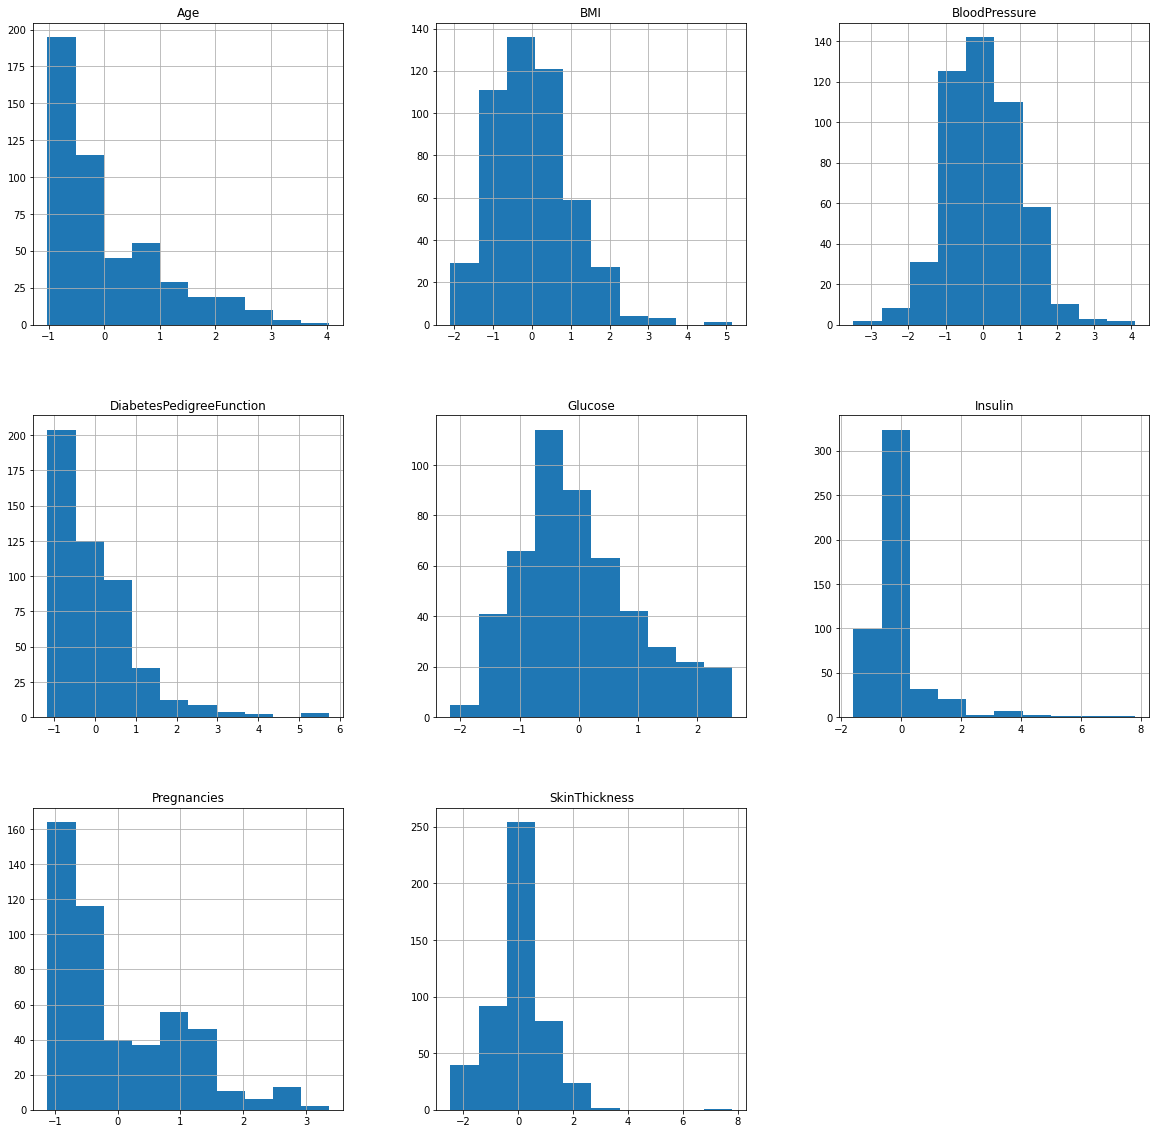

In [318]:
plotnew = x_train.hist(figsize = (20,20))

distributions of variables look better

# Decision tree



In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
tree = DecisionTreeClassifier(criterion='gini')

In [325]:
tree.fit(x_train, Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
from sklearn.metrics import accuracy_score

training_preds = tree.predict(x_train)
testing_preds = tree.predict(x_test)

In [327]:
train_accuracy = accuracy_score(Y_train, training_preds)
test_accuracy = accuracy_score(Y_test, testing_preds)

print("Test accuracy: "+ str(test_accuracy))

Test accuracy: 0.6422764227642277


# Random forest 
*   default hyperparameters



In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier()

In [31]:
rf.fit(x_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, rf.predict(x_test))

0.7154471544715447

In [57]:
#calculate feature importance
importance = pd.Series(rf.feature_importances_,index=x_train.columns).sort_values(ascending=False)
importance


Glucose                     0.268815
BMI                         0.154616
Age                         0.147352
DiabetesPedigreeFunction    0.109738
Insulin                     0.087440
BloodPressure               0.080639
Pregnancies                 0.076163
SkinThickness               0.075237
dtype: float64

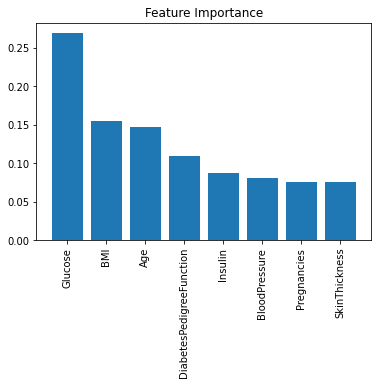

In [60]:
from matplotlib import pyplot
pyplot.bar([x for x in range(len(importance))], importance)

feature_names = ['Glucose', 'BMI', 'Age','DiabetesPedigreeFunction','Insulin','BloodPressure','Pregnancies','SkinThickness'] 
pyplot.xticks(range(len(importance)), feature_names)
pyplot.xticks(rotation=90)


pyplot.title("Feature Importance")
pyplot.show()

grid search

In [0]:
from sklearn.model_selection import GridSearchCV 

max_depth = list(np.arange(1,10))
max_depth.append(None)

param_grid = { 
    'max_depth': max_depth,
    'n_estimators': np.arange(100, 1100, 200), 
    'min_samples_split': [2,4,8,16],
    'min_samples_leaf': [1, 2, 4]
}

In [411]:
np.arange(10, 100, 10)

array([10, 20, 30, 40, 50, 60, 70, 80, 90])

In [0]:
#Create base model: 
rf = RandomForestClassifier()

In [0]:
#Create grid search model: 
grid = GridSearchCV(estimator = rf, param_grid=param_grid, 
                          cv = 3, verbose = 51, n_jobs=-1)

In [0]:
import time

In [415]:
t_start = time.time()
grid.fit(x_train, Y_train)
t_end = time.time()

Fitting 3 folds for each of 600 candidates, totalling 1800 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 

In [416]:
best = grid.best_estimator_
best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [417]:
best.fit(x_train, Y_train)
accuracy_score(Y_test, best.predict(x_test))

0.7317073170731707

randomsearchcv

In [0]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_distributions = param_grid, 
                                   n_jobs = -1, verbose=50, n_iter=500, cv=3)

In [419]:
random_search.fit(x_train, Y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [420]:
best_random = random_search.best_estimator_ 
best_random

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [422]:
accuracy_score(Y_test, best_random.fit(x_train, Y_train).predict(x_test))

0.7235772357723578

# Ridge, Lasso and Elastic Net

In [400]:
#ridge
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier().fit(x_train, Y_train)
clf.score(x_test, Y_test)

0.7317073170731707

In [401]:
#lasso
from sklearn import linear_model
clf2 = linear_model.Lasso(alpha=0.01)
clf2.fit(x_train, Y_train)
clf2.score(x_test, Y_test)

0.245851550712088

ridge outperforms lasso

In [403]:
#elastic net
from sklearn.linear_model import ElasticNet
regr = ElasticNet()
regr.fit(x_train, Y_train)
regr.score(x_test, Y_test)

-0.0013328428077001853

# KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

pick the best k

In [0]:
import matplotlib.pyplot as plt

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, Y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Mean Error')

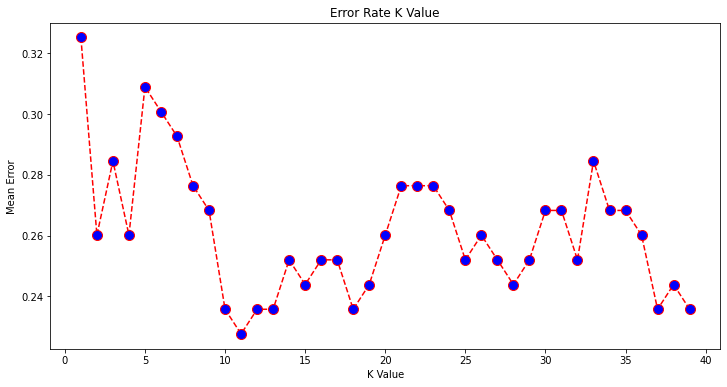

In [351]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

pick k=11 because the mean error is zero at that value

In [0]:
knn = KNeighborsClassifier(n_neighbors=11)

In [19]:
knn.fit(x_train,Y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [0]:
y_pred = knn.predict(x_test)

In [0]:
from sklearn import metrics

In [23]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.7723577235772358


In [0]:
#roc curve and auc score
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

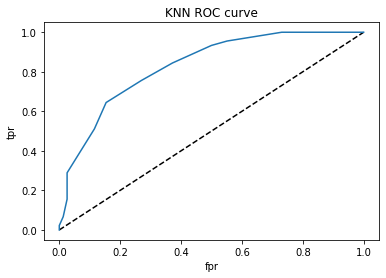

In [61]:
import matplotlib.pyplot as plt

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('KNN ROC curve')
plt.show()

In [28]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,y_pred_proba)

0.83005698005698

ann

In [67]:
from tensorflow import keras
from tensorflow.keras import layers
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()

model.add(Dense(8, activation='relu', input_shape=(8,)))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
                   
model.fit(x_train, Y_train,epochs=4, batch_size=1, verbose=1)

Epoch 1/4
491/491 [==============================] - 0s 971us/step - loss: 0.6252 - accuracy: 0.6823
Epoch 2/4
491/491 [==============================] - 0s 883us/step - loss: 0.4876 - accuracy: 0.7678
Epoch 3/4
491/491 [==============================] - 0s 879us/step - loss: 0.4491 - accuracy: 0.7943
Epoch 4/4
491/491 [==============================] - 0s 870us/step - loss: 0.4356 - accuracy: 0.7882


In [68]:
y_pred = model.predict_classes(x_test)
score = model.evaluate(x_test, Y_test,verbose=1)

print(score)

123/123 [==============================] - 0s 150us/step
[0.4966929002505977, 0.7235772609710693]


In [66]:
y_pred_test = classifier.predict(x_test)
y_pred_test=y_pred_test>0.5

y_pred_train = classifier.predict(x_train)
y_pred_train=y_pred_train>0.5

print("Accuracy on Train Set ==> ",metrics.accuracy_score(Y_train,y_pred_train))
print("Accuracy on Test Set ==> ",metrics.accuracy_score(Y_test,y_pred_test))

Accuracy on Train Set ==>  0.814663951120163
Accuracy on Test Set ==>  0.7154471544715447


# SVM


In [0]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix 

In [23]:
model = SVC(kernel='rbf') 
model.fit(x_train, Y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [372]:
predictions = model.predict(x_test) 
print(classification_report(Y_test, predictions)) 
#70% accuracy

              precision    recall  f1-score   support

           0       0.78      0.73      0.75        78
           1       0.58      0.64      0.61        45

    accuracy                           0.70       123
   macro avg       0.68      0.69      0.68       123
weighted avg       0.71      0.70      0.70       123



use gridsearchCV to tune hyperparameters

In [373]:
from sklearn.model_selection import GridSearchCV 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(x_train, Y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.646, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.653, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.653, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.653, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.653, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.747, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.653, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.646, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.653, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.653, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.653, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.653, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.646, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    2.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [374]:
print(grid.best_params_) 
print(grid.best_estimator_) 


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [376]:
grid_predictions = grid.predict(x_test) 
print(classification_report(Y_test, grid_predictions)) 
#72% accuracy

              precision    recall  f1-score   support

           0       0.79      0.77      0.78        78
           1       0.62      0.64      0.63        45

    accuracy                           0.72       123
   macro avg       0.70      0.71      0.70       123
weighted avg       0.73      0.72      0.72       123



# Voting classifiers 


In [0]:
from sklearn.ensemble import VotingClassifier 
from sklearn.metrics import accuracy_score 

In [0]:
SVC_clf = SVC(probability=True, kernel='rbf')
knn_clf = KNeighborsClassifier(n_neighbors=10)
rf_clf = RandomForestClassifier(random_state=5)

In [35]:
#hard margin
voting_clf = VotingClassifier(estimators=[('SVC', SVC_clf), ('knn', knn_clf), ('rf', rf_clf)], voting='hard')
voting_clf.fit(x_train, Y_train)
preds = voting_clf.predict(x_test)
acc = accuracy_score(Y_test, preds)
print("Accuracy is: " + str(acc))

Accuracy is: 0.7398373983739838


In [409]:
#soft margin
voting_clf = VotingClassifier(estimators=[('SVC', SVC_clf), ('knn', knn_clf), ('rf', rf_clf)], voting='soft')
voting_clf.fit(x_train, Y_train)
preds = voting_clf.predict(x_test)
acc = accuracy_score(Y_test, preds)
print("Accuracy is: " + str(acc))

Accuracy is: 0.7235772357723578


# Bagging- Decision Tree

In [0]:
from sklearn import model_selection 
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 
import pandas as pd 

In [392]:
dtc = DecisionTreeClassifier()
bag_model=BaggingClassifier(base_estimator=dtc, n_estimators=1000, bootstrap=True)
bag_model=bag_model.fit(x_train,Y_train)
ytest_pred=bag_model.predict(x_test)
print(bag_model.score(x_test, Y_test))

0.7073170731707317


Bagging- Random Forest

In [394]:
#randomstate = 5
randomforest = RandomForestClassifier()
bag_model1=BaggingClassifier(base_estimator=randomforest, n_estimators=100, bootstrap=True)
bag_model1=bag_model1.fit(x_train,Y_train)
ytest_pred1=bag_model1.predict(x_test)
print(bag_model1.score(x_test, Y_test))

0.7154471544715447


# XGBoost

In [0]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier

In [399]:
gbm = xgb.XGBClassifier(max_depth=9, n_estimators=1000, learning_rate=0.01, subsample=.8, colsample_bytree=1, gamma=1).fit(x_train, Y_train)
predictions1 = gbm.predict(x_test)
accuracy1 = accuracy_score(Y_test, predictions1)
accuracy1

0.6910569105691057